# Day 3: Multi-Class Classification with Decision Trees

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


In [2]:
# Load dataset
df = pd.read_csv('Mall Customer Segmentation.csv')

In [3]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Dataset Information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Check basic statistics
print("\nStatistical Summary of Numerical Features:")
print(df.describe())


Statistical Summary of Numerical Features:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


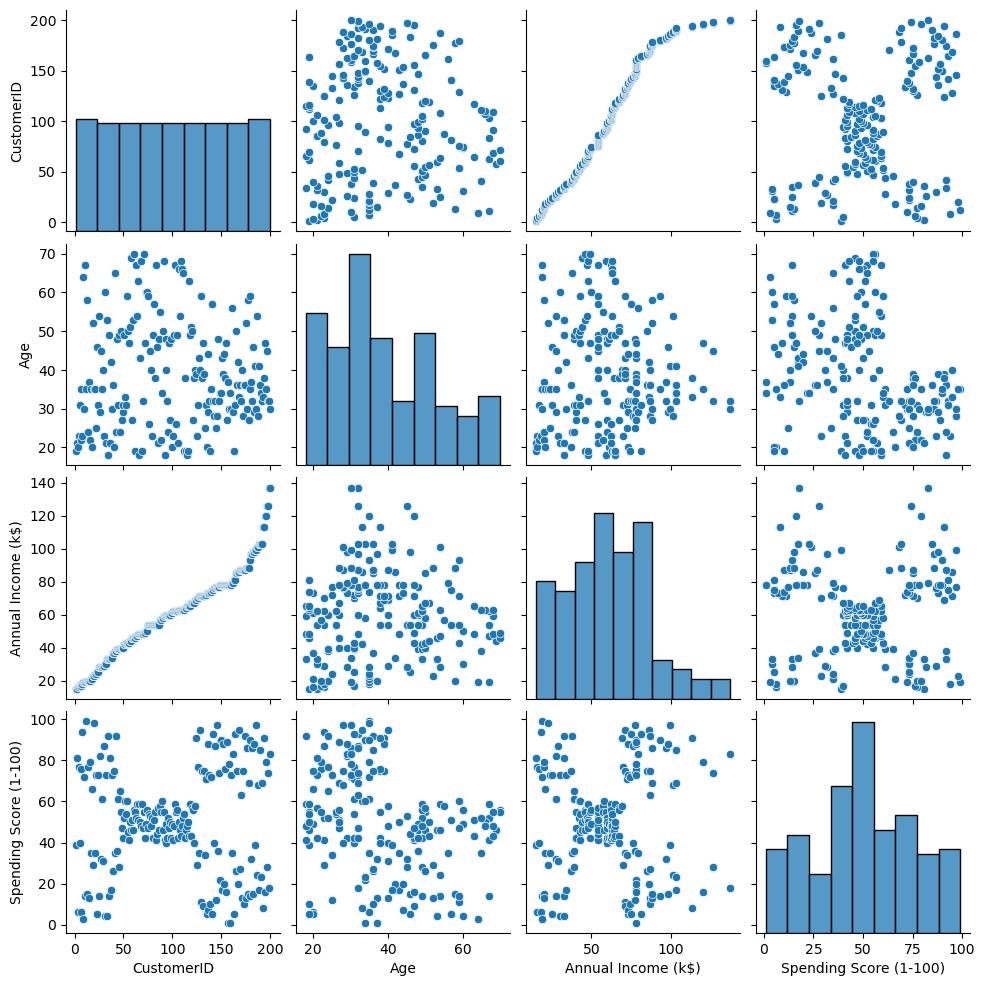

In [10]:
sns.pairplot(df)
plt.show()

C:\Users\swaro\AppData\Local\Temp\ipykernel_19812\1132731736.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


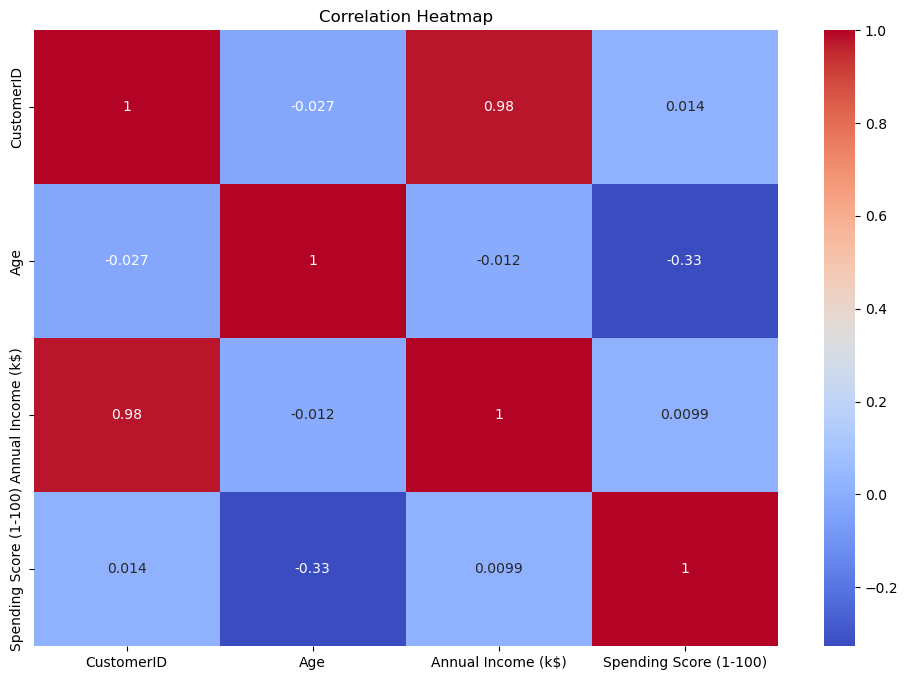

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Drop irrelevant columns
df = df.drop('CustomerID', axis=1)

In [13]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [14]:
# Display processed dataset
print("\nData after removing irrelevant columns and encoding Gender:")
print(df.head())



Data after removing irrelevant columns and encoding Gender:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


In [15]:
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

In [16]:
# Display standardized data
print("\nData after standardization:")
print(df.head())


Data after standardization:
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0       1 -1.424569           -1.738999               -0.434801
1       1 -1.281035           -1.738999                1.195704
2       0 -1.352802           -1.700830               -1.715913
3       0 -1.137502           -1.700830                1.040418
4       0 -0.563369           -1.662660               -0.395980


In [18]:
# Use K-Means clustering to create segments
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Category'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\swaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
# Map categories to human-readable labels
df['Category'] = df['Category'].map({
    0: 'Low Spend',
    1: 'Medium Spend',
    2: 'High Spend'
})

In [20]:
print("\nDataset after adding customer segments (target variable):")
print(df.head())


Dataset after adding customer segments (target variable):
   Gender       Age  Annual Income (k$)  Spending Score (1-100)    Category
0       1 -1.424569           -1.738999               -0.434801  High Spend
1       1 -1.281035           -1.738999                1.195704  High Spend
2       0 -1.352802           -1.700830               -1.715913  High Spend
3       0 -1.137502           -1.700830                1.040418  High Spend
4       0 -0.563369           -1.662660               -0.395980  High Spend


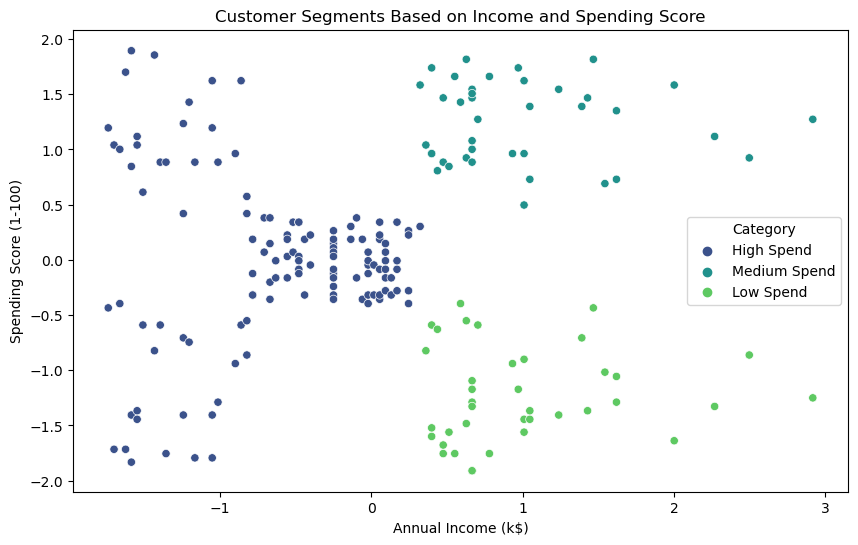

In [21]:
# Visualize Customer Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Category', 
    data=df, 
    palette='viridis'
)
plt.title('Customer Segments Based on Income and Spending Score')
plt.show()

In [22]:
# Define features (X) and target (y)
X = df.drop('Category', axis=1)  # All columns except Category
y = df['Category']  # Target variable

In [24]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for optimization
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [26]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [27]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [29]:
# Get the best model from GridSearchCV
best_dt = grid_search.best_estimator_

In [30]:
# Display best parameters
print("\n Best Parameters from GridSearchCV:")
print(grid_search.best_params_)


 Best Parameters from GridSearchCV:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [31]:
# Train the final Decision Tree Classifier with best parameters
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [32]:
# Display the feature importance
importances = best_dt.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                  Feature  Importance
2      Annual Income (k$)    0.649972
3  Spending Score (1-100)    0.350028
0                  Gender    0.000000
1                     Age    0.000000


In [34]:
# Make predictions on the test set
y_pred = best_dt.predict(X_test)

In [36]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9750
Precision: 0.9778
Recall: 0.9750
F1-Score: 0.9755


In [37]:
# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

  High Spend       1.00      0.96      0.98        24
   Low Spend       1.00      1.00      1.00         8
Medium Spend       0.89      1.00      0.94         8

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



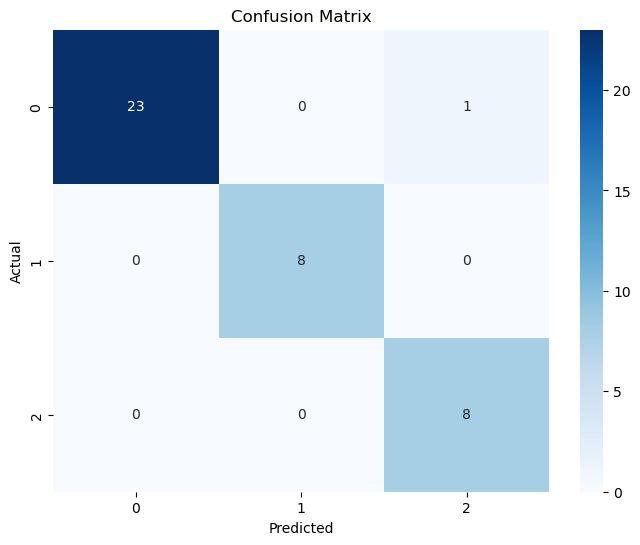

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

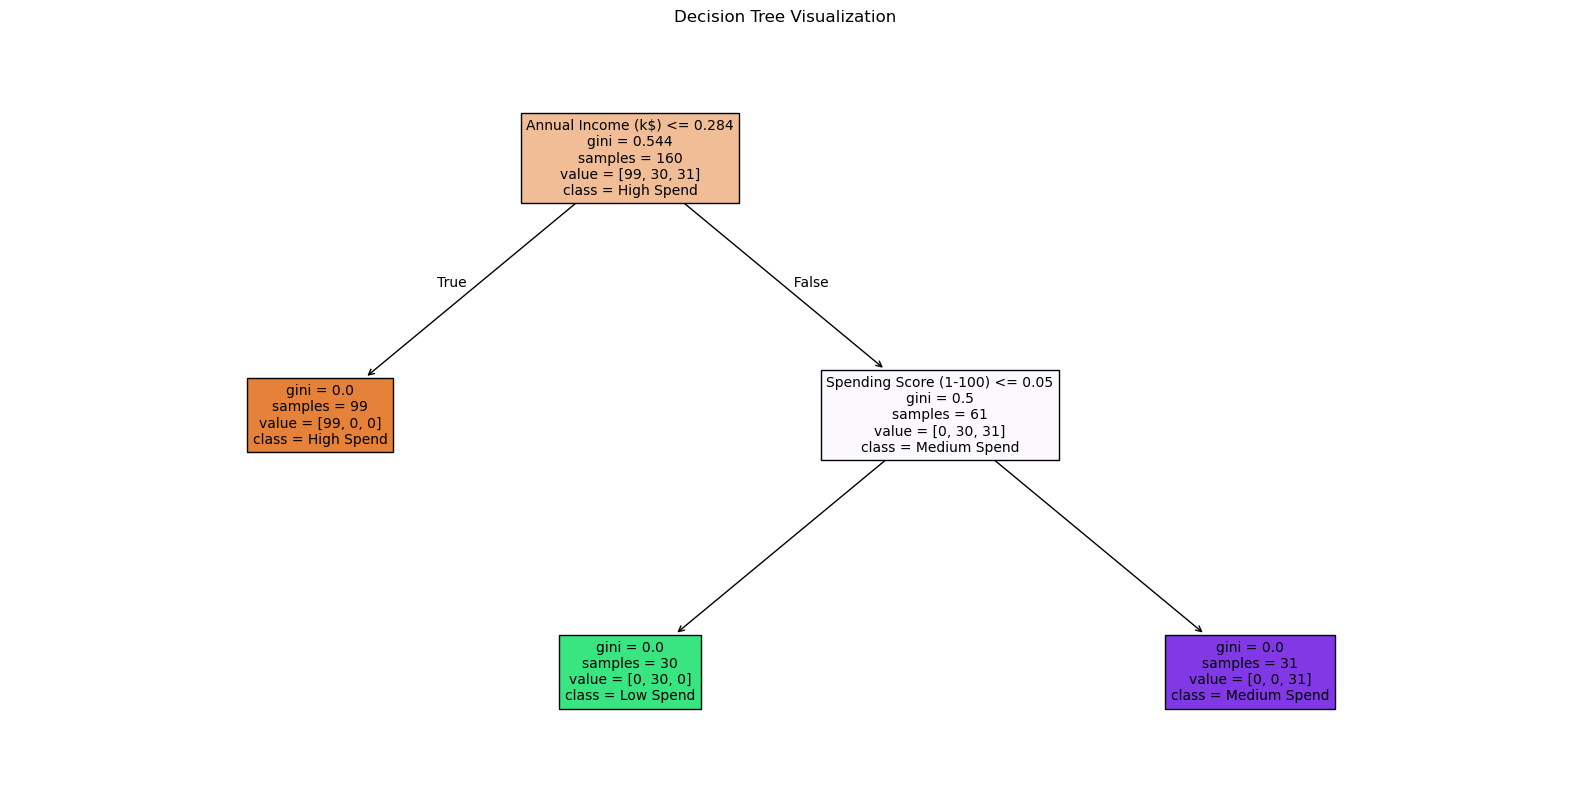

In [40]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=[str(cls) for cls in np.unique(y)],
    filled=True,
    fontsize=10
)
plt.title('Decision Tree Visualization')
plt.show()